# TP2: Regresión del valor de valor medio de casas en distritos de California

Se requiere construir un modelo de regresión que permita predecir el valor medio de las casas en distintos distritos de California, EE. UU. (medido en cientos de miles de dólares, es decir, $100,000). Este conjunto de datos proviene del censo de EE. UU. de 1990, donde cada observación corresponde a un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EE. UU. publica datos de muestra, y típicamente tiene una población de entre 600 y 3.000 personas.

Los atributos, en el orden en que se presentan en el conjunto de datos, son:

    MedInc: Ingreso medio en el bloque
    HouseAge: Edad mediana de las casas en el bloque
    AveRooms: Número promedio de habitaciones por hogar
    AveBedrms: Número promedio de dormitorios por hogar
    Population: Población del bloque
    AveOccup: Número promedio de personas por hogar
    Latitude: Latitud del bloque
    Longitude: Longitud del bloque

El target es:

    MedHouseVal: Mediana del valor de las casas en el bloque (en unidades de $100,000)


# Importamos librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Lectura de datos, separación en target y matriz de features

In [2]:
df = fetch_california_housing(as_frame=True)
df = df.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# Análisis Exploratorio

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Todas las variables son numéricas y no presentan valores nulos

In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### **1. Obtener la correlación entre los atributos y entre los atributos y el target.**


1. ¿Qué atributo tiene mayor correlación lineal con el target?
2. ¿Cuáles atributos parecen estar más correlacionados entre sí?




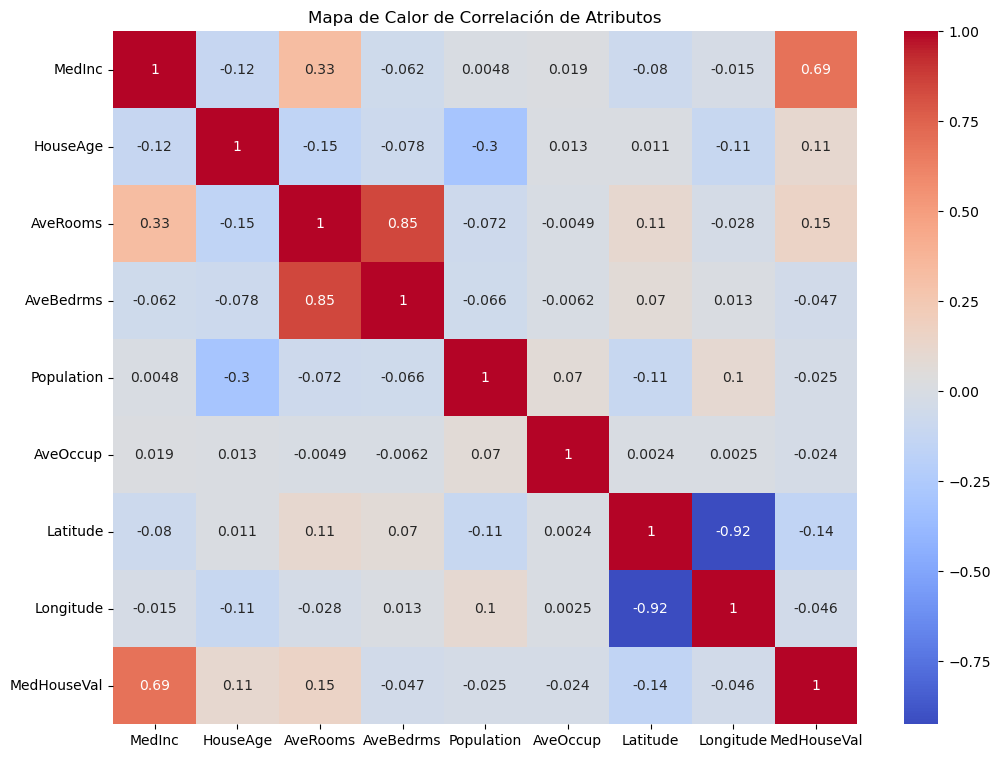

In [5]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación de Atributos')
plt.show()

In [6]:
#Ordenamos las features según importancia de correlación con target (MedHouseVal)
corr_with_target = correlation_matrix['MedHouseVal'].sort_values(ascending=False)
print("Correlación de los atributos con el valor medio de la vivienda (MedHouseVal):")
print(corr_with_target)

Correlación de los atributos con el valor medio de la vivienda (MedHouseVal):
MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64




1.   **La variable MedInc, Ingreso medio en el bloque, tiene mayor correlación con la target en módulo, y a su vez es positiva, lo cual es razonable.**
2.   **Los atributos que parecen estar más correlacionados entre sí son lat y long, AvgBdrooms con MedInc, AvgRooms con AvgBedrooms, y Population con HouseAge (inversamente relacionadas). El último hallazgo nos resulta llamativo.**



### **2. Graficar los histogramas de los distintos atributos y target:**


1.  ¿Qué forma presentan los histogramas?
2.  ¿Alguno muestra una distribución similar a una campana que sugiera una distribución gaussiana, sin necesidad de realizar pruebas de hipótesis?








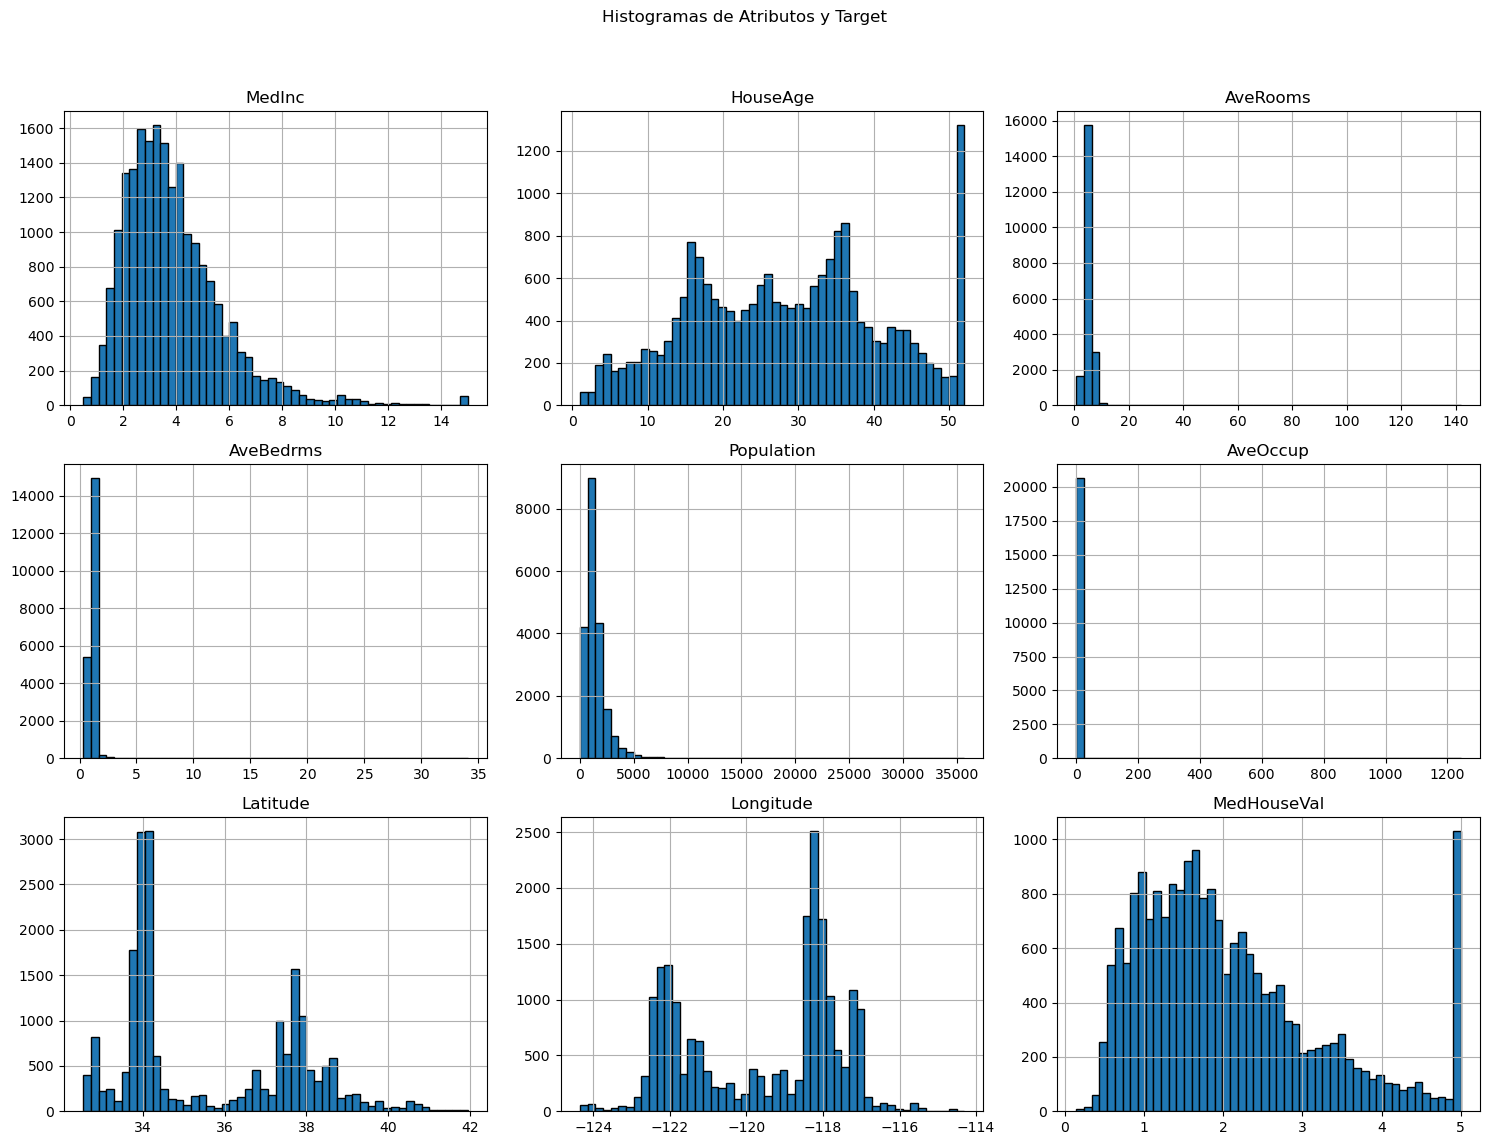

In [7]:
df.hist(figsize=(15, 12), bins=50, edgecolor='black')
plt.suptitle('Histogramas de Atributos y Target')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Ninguna variable presenta distribución gaussiana a simple vista.**

**Sí podemos observar dos distribuciones bimodales: Lat, Long.**

**Por otro lado, las variables target, Pop, AvgRoom, AvgBedrooms, AveOccuup, MedInc y MedHouseVal (target) presentan asimetría a derecha. Esto último lo corregiremos con transformación logarítmica para similitud a una normal y mejor ajuste de modelos, sin necesidad de quitar outliers, dado que desconocemos su origen.**

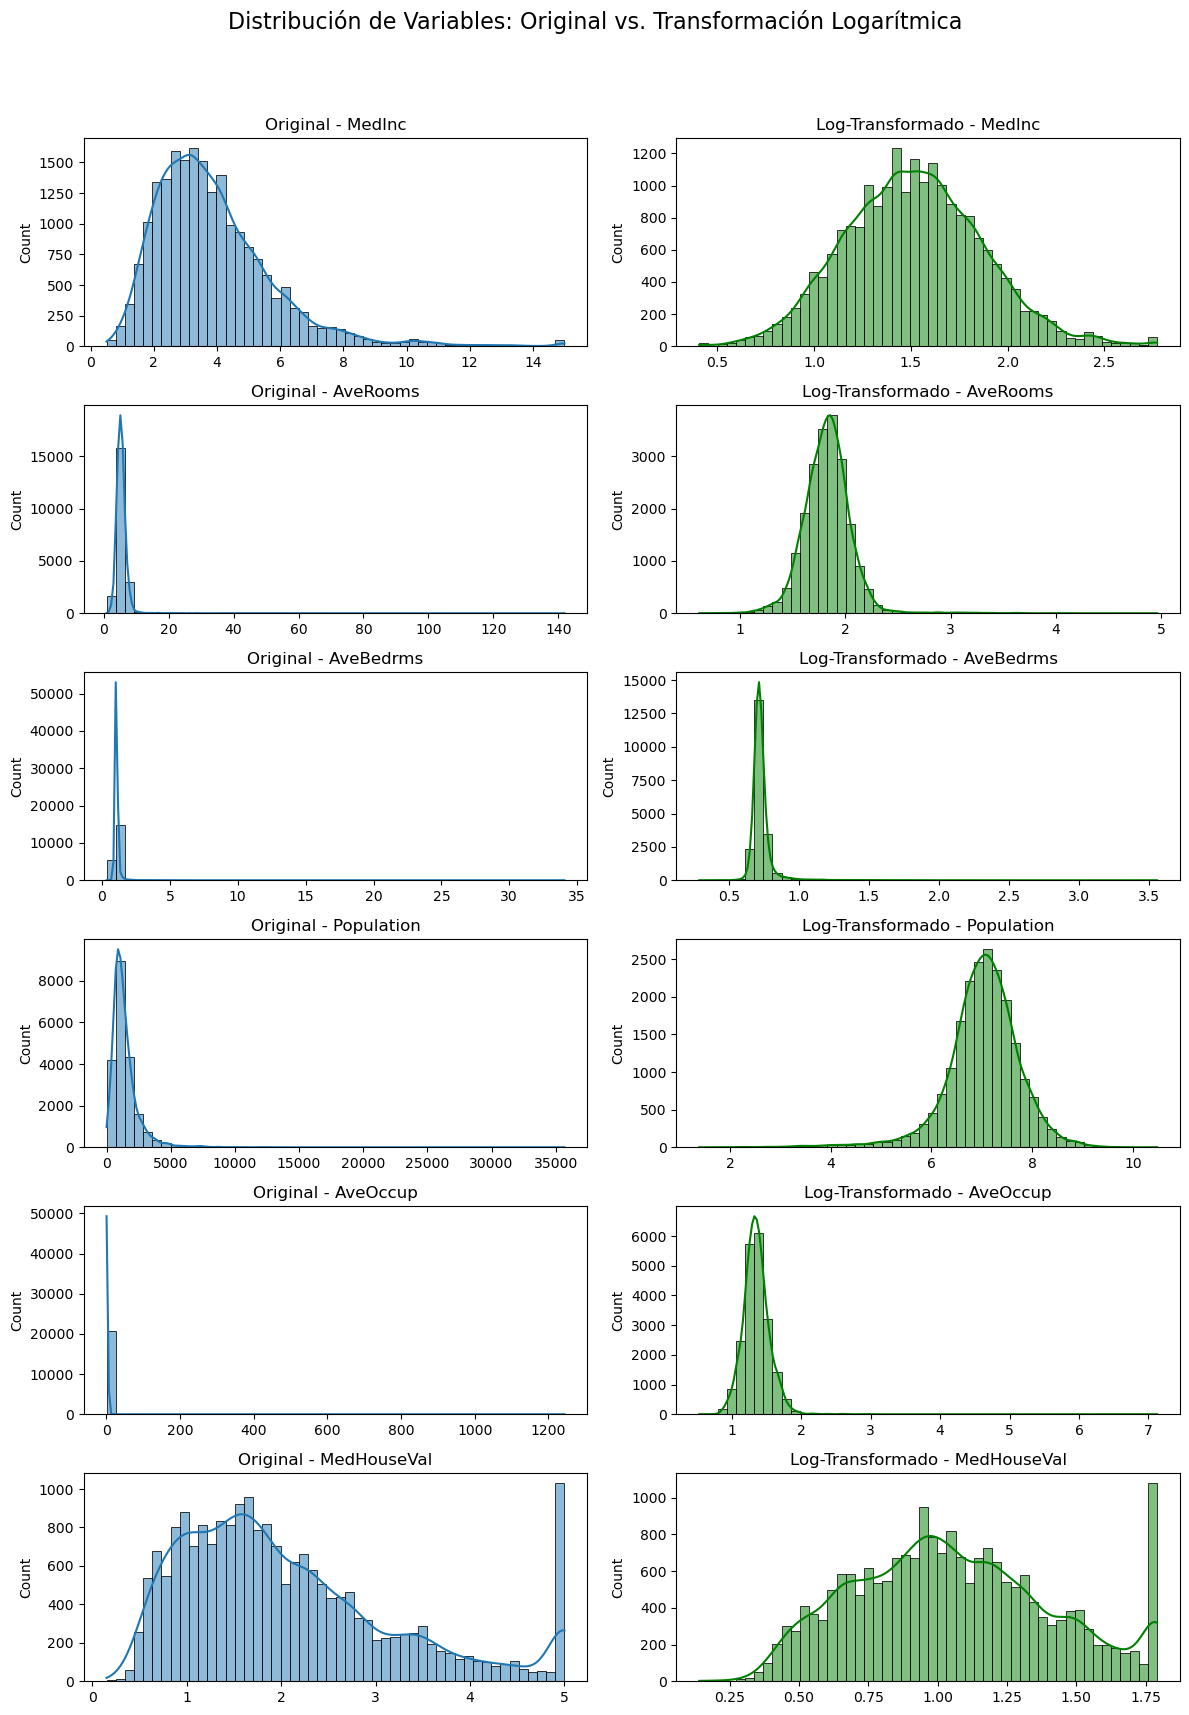

In [8]:
##Aplicamos transformación logarítmica a variables con asimetría a derecha (menos sensible a outliers y los incluimos ya que desconocemos el motivo de su aparición)
cols_transform = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']

#Creamos df para los datos transformados
df_log = df.copy()

#Aplicar la transformación log1p (mejor si hay valores 0 en las variables)
for col in cols_transform:
    df_log[col] = np.log1p(df[col])

#Graficamos antes y después de la transformación
fig, axes = plt.subplots(len(cols_transform), 2, figsize=(12, 18))
fig.suptitle('Distribución de Variables: Original vs. Transformación Logarítmica', fontsize=16)

for i, col in enumerate(cols_transform):
    # Gráfico Original
    sns.histplot(df[col], kde=True, ax=axes[i, 0], bins=50)
    axes[i, 0].set_title(f'Original - {col}')
    axes[i, 0].set_xlabel('')

    # Gráfico Transformado
    sns.histplot(df_log[col], kde=True, ax=axes[i, 1], bins=50, color='green')
    axes[i, 1].set_title(f'Log-Transformado - {col}')
    axes[i, 1].set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Evaluación de modelos de regresion lineal

### **3. Calcular una regresión lineal utilizando todos los atributos.**


1.   Con el conjunto de entrenamiento, calcular la varianza total de los datos y la varianza explicada por el modelo.
2.  ¿Está el modelo capturando adecuadamente el comportamiento del target? Fundamente su respuesta.



In [10]:
#Separamos en target 'y' y matriz de features X
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [11]:
#Separación en train y test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
#Estandarizamos variables en train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#Estandarizamos varaibles en test
X_test_scaled = scaler.transform(X_test)

In [21]:
#Instanciamos y entrenamos Regresión Lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

#Varianza total de target en train
total_variance = np.var(y_train)

#Varianza explicada por el modelo
explained_variance_ratio = lin_reg.score(X_train_scaled, y_train)
explained_variance = total_variance * explained_variance_ratio

print(f"Varianza Total (train): {total_variance:.2f}")
print(f"Proporción de la varianza Explicada por el Modelo (train): {explained_variance:.2f}")
print(f"R²: {explained_variance_ratio:.2f}")

Varianza Total (train): 1.34
Proporción de la varianza Explicada por el Modelo (train): 0.82
R²: 0.61


In [22]:
# Predicciones sobre el conjunto de entrenamiento
y_train_pred = lin_reg.predict(X_train_scaled)

# Calcular el R2 para el conjunto de entrenamiento
r2_train = r2_score(y_train, y_train_pred)

# Cálculo manual
ss_res = np.sum((y_train - y_train_pred) ** 2)  # Error cuadrático total (residuos)
ss_tot = np.sum((y_train - np.mean(y_train)) ** 2)  # Varianza total
ss_explicada = ss_tot - ss_res  # Varianza explicada
r2_manual = 1 - (ss_res / ss_tot)

# Mostrar resultados
print(f"- SS_res (error cuadrático total): {ss_res:.2f}")
print(f"- SS_tot (varianza total): {ss_tot:.2f}")
print(f"- Error explicado por el modelo:: {ss_explicada:.2f}")
print(f"- R² manual resultante: {r2_manual:.4f}")

# Verificación con scikit-learn
print(f"- El R² del modelo en el conjunto de entrenamiento (scikit) es: {r2_train:.4f}")

- SS_res (error cuadrático total): 7561.47
- SS_tot (varianza total): 19355.93
- Error explicado por el modelo:: 11794.46
- R² manual resultante: 0.6093
- El R² del modelo en el conjunto de entrenamiento (scikit) es: 0.6093


> **Respuesta a la pregunta: ¿Está el modelo capturando adecuadamente el comportamiento del target?**

> El R2 en el conjunto de entrenamiento nos indica la proporción de la variabilidad del target que es explicada por el modelo. Un R2 de 0.61 indica que aproximadamente el 61% de la variación en el valor medio de las casas en el conjunto de entrenamiento es explicada por las características.

> Esto sugiere que el modelo captura una parte significativa del comportamiento del target, pero también hay una cantidad considerable de variabilidad (casi el 39%) que no es explicada por este modelo lineal, en el conjunto de entrenamiento. Corresponde realizar un test analogo sobre el conjunto de prueba, para entender si el modelo logra captar la variabilidad del target y si logra generalizar bien fuera de los datos ya vistos.

### **4. Calcular las métricas de MSE, MAE y R² sobre el conjunto de evaluación.**

In [13]:
#Predecimos con test
y_pred_lin = lin_reg.predict(X_test_scaled)

#Evaluación de métricas
mse_lin = mean_squared_error(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Métricas en test:")
print(f"Error Cuadrático Medio (MSE): {mse_lin:.2f}")
print(f"Error Absoluto Medio (MAE): {mae_lin:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_lin:.2f}")

Métricas en test:
Error Cuadrático Medio (MSE): 0.53
Error Absoluto Medio (MAE): 0.53
Coeficiente de Determinación (R²): 0.60


In [14]:
##VOLVEMOS A ENTRENAR EL MODELO CON VARIABLES TRANSFORMADAS
X_log = df_log.drop('MedHouseVal', axis=1)
y_log = df_log['MedHouseVal']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.3, random_state=42)

scaler_log = StandardScaler()
X_train_log_scaled = scaler_log.fit_transform(X_train_log)
X_test_log_scaled = scaler_log.transform(X_test_log)

lin_reg_log = LinearRegression()
lin_reg_log.fit(X_train_log_scaled, y_train_log)

#Predicciones en escala LOG
y_pred_log = lin_reg_log.predict(X_test_log_scaled)

#Predicciones
y_pred_real = np.expm1(y_pred_log)

#Evaluación contra y_pred en escala lineal
mse_log = mean_squared_error(y_test, y_pred_real)
mae_log = mean_absolute_error(y_test, y_pred_real)
r2_log = r2_score(y_test, y_pred_real)

print("Métricas en test del modelo entrenado con datos Log-Transformados")
print(f"Error Cuadrático Medio (MSE): {mse_log:.4f}")
print(f"Error Absoluto Medio (MAE): {mae_log:.4f}")
print(f"Coeficiente de Determinación (R²): {r2_log:.4f}")


Métricas en test del modelo entrenado con datos Log-Transformados
Error Cuadrático Medio (MSE): 0.4418
Error Absoluto Medio (MAE): 0.4723
Coeficiente de Determinación (R²): 0.6634


### **5. Crear una Regresión de Ridge**

1. Usar validación cruzada de 5 folds y tomar como métrica el MSE.
2. Buscar el mejor valor de α en el rango [0, 12.5].
3. Graficar el MSE en función de α.


El mejor valor de alpha encontrado es: 2.02


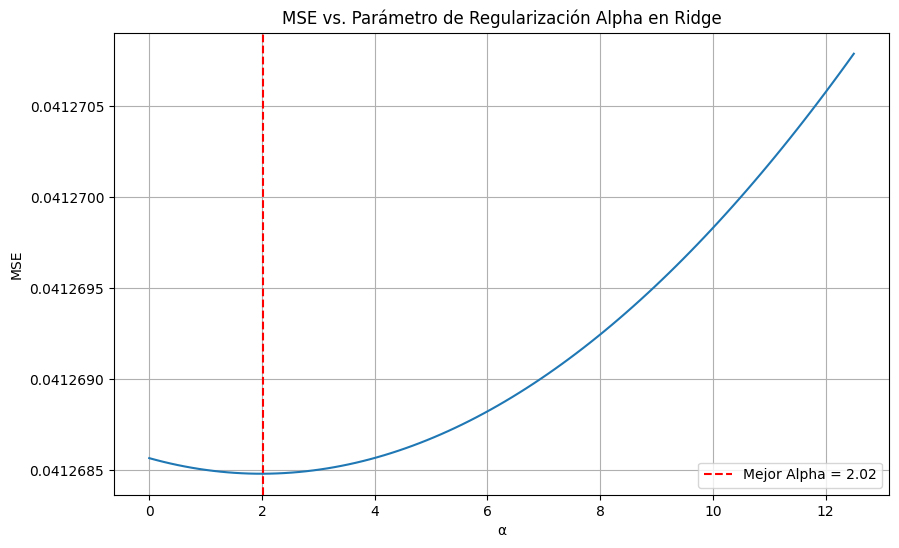

In [15]:
#Rango de alphas a probar
alphas = np.linspace(0, 12.5, 100)

#Lista para almacenar los MSE de validación cruzada para cada alpha
cv_mses = []

#CV para cada alpha
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, X_train_log_scaled, y_train_log, cv=5, scoring="neg_mean_squared_error")#MSE
    # Convertir los scores a MSE positivo y calcular la media
    mean_mse = -scores.mean()
    cv_mses.append(mean_mse)

#El mejor alpha (minimiza el MSE)
best_alpha_index = np.argmin(cv_mses)
best_alpha = alphas[best_alpha_index]
print(f"El mejor valor de alpha encontrado es: {best_alpha:.2f}")

#Graficamos MSE vs. alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, cv_mses)
plt.xlabel('α')
plt.ylabel('MSE')
plt.title('MSE vs. Parámetro de Regularización Alpha en Ridge')
plt.axvline(best_alpha, color='r', linestyle='--', label=f'Mejor Alpha = {best_alpha:.2f}')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
#Instanciamos regresión lineal con regularización Ridge paa el mejor alpha encontrado
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train_log_scaled, y_train_log)

#Predicciones
y_pred_ridge_log = best_ridge.predict(X_test_log_scaled)

y_pred_ridge = np.expm1(y_pred_ridge_log)
#Métricas para Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

#DF comparativa de métricas
comparison_df = pd.DataFrame({
    'Métrica': ['MSE', 'MAE', 'R²'],
    'Regresión Lineal': [mse_log, mae_log, r2_log],
    'Regresión Ridge': [mse_ridge, mae_ridge, r2_ridge]
})

print("Comparación de Modelos en el Conjunto de Prueba:")
print(comparison_df.to_string(index=False))

Comparación de Modelos en el Conjunto de Prueba:
Métrica  Regresión Lineal  Regresión Ridge
    MSE          0.441793         0.441854
    MAE          0.472299         0.472336
     R²          0.663406         0.663359


### **6. Comparar los resultados obtenidos entre la regresión lineal y la mejor regresión de Ridge, evaluando el conjunto de prueba.**

1. ¿Cuál de los dos modelos obtiene mejores resultados en términos de MSE y MAE? ¿Poseen suficiente diferencia como para indicar si uno es mejor que el otro?
2. ¿Qué tipo de error podría haberse reducido?



> **Ambos modelos tienen una performance muy similar. La principal mejora se logró al trabajar con las variables con asimetría a derecha en escala logarítmica, pero luego de esto la regularización aplicada no mejora los resultados. Probablemente se deba a que el alpha óptimo encontrado es muy bajo, del orden de 2 (cercano a 0 no aplica regularización).**

# Extra: Análisis de betas y comparativa de y_pred vs y_real para ambos modelos

In [17]:
# Obtener los nombres de los atributos
feature_names = X.columns

# Obtener los coeficientes e interceptos de ambos modelos
linear_coeffs = lin_reg.coef_
ridge_coeffs = best_ridge.coef_
linear_intercept = lin_reg.intercept_
ridge_intercept = best_ridge.intercept_

# Crear un DataFrame para una visualización clara
coeffs_df = pd.DataFrame({
    'Atributo': feature_names,
    'Coeficiente Lineal': linear_coeffs,
    'Coeficiente Ridge': ridge_coeffs
})

print("--- Intercepto de los Modelos ---")
print(f"Intercepto del Modelo Lineal: {linear_intercept:.4f}")
print(f"Intercepto del Modelo de Ridge: {ridge_intercept:.4f}\n")

print("--- Coeficientes de los Modelos ---")
print(coeffs_df)

# Escribir la expresión de la recta para el modelo lineal
print("\n--- Expresión de la Recta (Modelo de Regresión Lineal) ---")
expression = f"MedHouseVal = {linear_intercept:.4f}"
for i, col in enumerate(feature_names):
    expression += f" + ({linear_coeffs[i]:.4f} * {col}_scaled)"
print(expression)

--- Intercepto de los Modelos ---
Intercepto del Modelo Lineal: 2.0692
Intercepto del Modelo de Ridge: 1.0561

--- Coeficientes de los Modelos ---
     Atributo  Coeficiente Lineal  Coeficiente Ridge
0      MedInc            0.849222           0.258982
1    HouseAge            0.122119           0.035350
2    AveRooms           -0.299558          -0.065175
3   AveBedrms            0.348410           0.066969
4  Population           -0.000884           0.009436
5    AveOccup           -0.041698          -0.069185
6    Latitude           -0.893856          -0.314161
7   Longitude           -0.868617          -0.292487

--- Expresión de la Recta (Modelo de Regresión Lineal) ---
MedHouseVal = 2.0692 + (0.8492 * MedInc_scaled) + (0.1221 * HouseAge_scaled) + (-0.2996 * AveRooms_scaled) + (0.3484 * AveBedrms_scaled) + (-0.0009 * Population_scaled) + (-0.0417 * AveOccup_scaled) + (-0.8939 * Latitude_scaled) + (-0.8686 * Longitude_scaled)


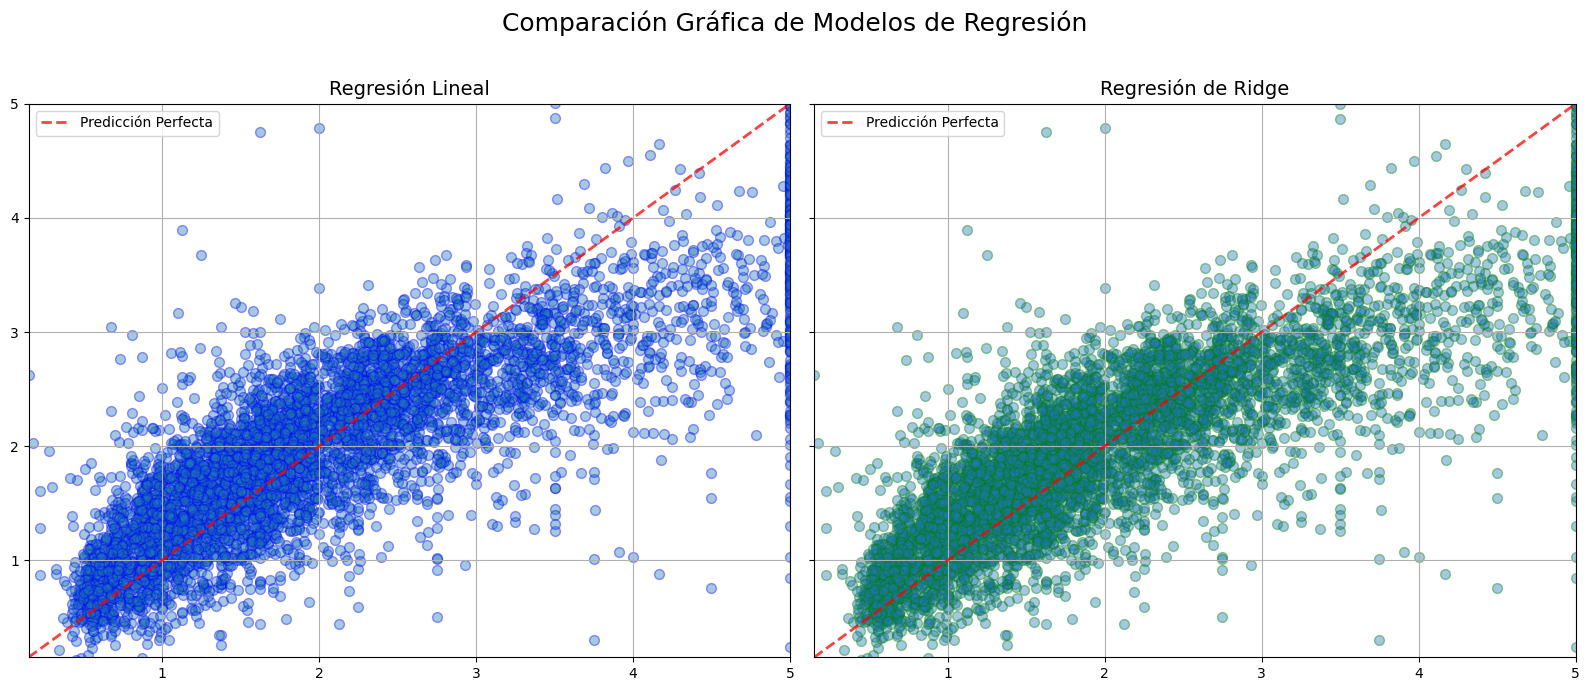

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), sharex=True, sharey=True)

# 1. Gráfico para la Regresión Lineal
ax1.scatter(y_test, y_pred_real, alpha=0.4, edgecolors='b', s=50)
ax1.set_title('Regresión Lineal', fontsize=14)
ax1.grid(True)

#Agregamos línea de tendencia
lims = [y_test.min(), y_test.max()]
ax1.plot(lims, lims, 'r--', alpha=0.75, lw=2, label='Predicción Perfecta')
ax1.legend()
ax1.set_xlim(lims)
ax1.set_ylim(lims)

# 2. Gráfico para la Regresión de Ridge
ax2.scatter(y_test, y_pred_ridge, alpha=0.4, edgecolors='g', s=50)
ax2.set_title('Regresión de Ridge', fontsize=14)

ax2.grid(True)

ax2.plot(lims, lims, 'r--', alpha=0.75, lw=2, label='Predicción Perfecta')
ax2.legend()
ax2.set_xlim(lims)
ax2.set_ylim(lims)

plt.suptitle('Comparación Gráfica de Modelos de Regresión', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Si bien ambos modelos difieren en los valores de beta obtenidos, la performance global de ambos es muy similar, comparando MSE y MAE.